In [1]:
# Cargar archivo m3_mini.stl

import trimesh

# Cargar el archivo STL
modelo = trimesh.load_mesh("C:/Users/aranc/OneDrive/Escritorio/MASTER/TFM/m3_mini.stl")

# Mostrar información básica del modelo
print("Número de vértices:", len(modelo.vertices))
print("Número de caras:", len(modelo.faces))

# Visualizar el modelo en 3D
modelo.show()

Número de vértices: 2393
Número de caras: 4782


In [2]:
# BUSCAR UN TRIÁNGULO PARA EXTRAER

from stl import mesh
import numpy as np
import os

# Función para comparar vértices con tolerancia
def son_iguales(v1, v2, tol=1e-6):
    return np.linalg.norm(v1 - v2) < tol

# Cargar el modelo STL
archivo_entrada = "C:/Users/aranc/OneDrive/Escritorio/MASTER/TFM/m3_mini.stl"  
modelo = mesh.Mesh.from_file(archivo_entrada)

# Buscar una facet 
indice_facet = None

for i, facet in enumerate(modelo.vectors):
    v1, v2, v3 = facet
    if not (son_iguales(v1, v2) or son_iguales(v2, v3) or son_iguales(v1, v3)):
        indice_facet = i
        print(f"Facet válida encontrada en índice {i}:")
        print(f"   Vértice 1: {v1}")
        print(f"   Vértice 2: {v2}")
        print(f"   Vértice 3: {v3}")
        break

# Si no se encontró una facet, mostrar mensaje y salir
if indice_facet is None:
    print("No se encontró ninguna facet en el archivo STL.")
    exit()

# Obtener las coordenadas de la facet específica
facet_extraida = modelo.vectors[indice_facet]

# Crear un nuevo mesh con solo esta facet
nuevo_mesh = mesh.Mesh(np.zeros(1, dtype=mesh.Mesh.dtype))
nuevo_mesh.vectors[0] = facet_extraida

# Crear un nombre de archivo más informativo
nombre_archivo = f"facet_extraida_{indice_facet}.stl"
carpeta_salida = os.path.dirname(archivo_entrada)
archivo_salida = os.path.join(carpeta_salida, nombre_archivo)

# Guardar la facet como un nuevo archivo STL
nuevo_mesh.save(archivo_salida)
print(f"Facet {indice_facet} extraída y guardada como: {archivo_salida}")

Facet válida encontrada en índice 0:
   Vértice 1: [ 84.01633 159.59502  32.36286]
   Vértice 2: [ 84.27353  160.2075    33.196983]
   Vértice 3: [ 84.26405 159.13191  33.12033]
Facet 0 extraída y guardada como: C:/Users/aranc/OneDrive/Escritorio/MASTER/TFM\facet_extraida_0.stl


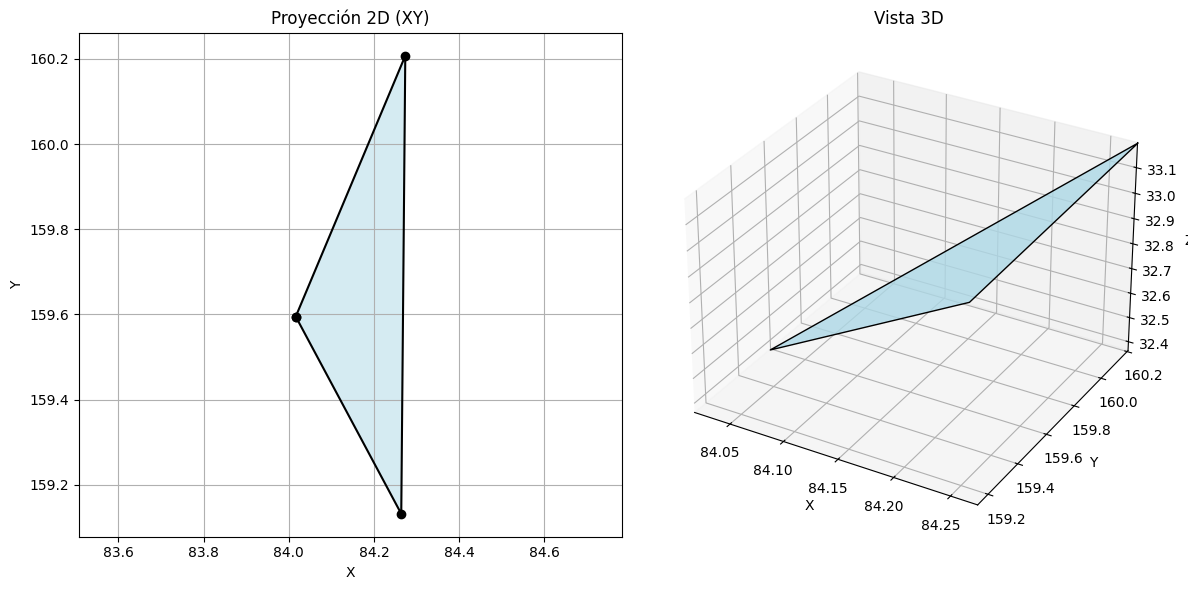

In [3]:
# VISUALIZACIÓN EN 2D (proyección XY) + 3D (vista completa) DEL FACET EXTRAIDO

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from stl import mesh

# Cargar el archivo STL de la facet
archivo_entrada = "C:/Users/aranc/OneDrive/Escritorio/MASTER/TFM/facet_extraida_0.stl"
modelo = mesh.Mesh.from_file(archivo_entrada)

# Obtener los vértices del triángulo
facet = modelo.vectors[0]
v1, v2, v3 = facet

# Preparar coordenadas para 2D (XY)
x2d = [v1[0], v2[0], v3[0], v1[0]]
y2d = [v1[1], v2[1], v3[1], v1[1]]

# Crear figura con 2 subplots
fig = plt.figure(figsize=(12, 6))

# === Subplot 1: Proyección 2D ===
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(x2d, y2d, marker='o', linestyle='-', color='black')
ax1.fill(x2d, y2d, color='lightblue', alpha=0.5)
ax1.set_title("Proyección 2D (XY)")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.axis("equal")
ax1.grid(True)

# === Subplot 2: Visualización 3D ===
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
tri = Poly3DCollection([facet], facecolors='lightblue', edgecolors='black', linewidths=1, alpha=0.8)
ax2.add_collection3d(tri)

# Ajustar límites para vista adecuada
x, y, z = facet[:, 0], facet[:, 1], facet[:, 2]
ax2.set_xlim(min(x), max(x))
ax2.set_ylim(min(y), max(y))
ax2.set_zlim(min(z), max(z))

ax2.set_title("Vista 3D")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")

plt.tight_layout()
plt.show()

In [4]:
# AVERIGUAR UNIDADES DE LONGITUD DEL TRIANGULO

import numpy as np
from stl import mesh

# Cargar el archivo STL con la facet extraída
archivo_entrada = "C:/Users/aranc/OneDrive/Escritorio/MASTER/TFM/facet_extraida_0.stl"
modelo = mesh.Mesh.from_file(archivo_entrada)

# Obtener las coordenadas de los vértices
v1, v2, v3 = modelo.vectors[0]

# Función para calcular distancia entre dos puntos 3D
def distancia(p1, p2):
    return np.linalg.norm(p1 - p2)

# Calcular longitudes de los lados
lado1 = distancia(v1, v2)
lado2 = distancia(v2, v3)
lado3 = distancia(v3, v1)

print(f"Longitudes de los lados del triángulo:")
print(f"Lado 1 (v1-v2): {lado1:.3f} unidades")
print(f"Lado 2 (v2-v3): {lado2:.3f} unidades")
print(f"Lado 3 (v3-v1): {lado3:.3f} unidades")

Longitudes de los lados del triángulo:
Lado 1 (v1-v2): 1.066 unidades
Lado 2 (v2-v3): 1.078 unidades
Lado 3 (v3-v1): 0.922 unidades


In [5]:
# MINI PROGRAMA PARA CALCULAR EL RADIO DE LA ESFERA (CÉLULA)

import numpy as np

def calcular_radio(volumen):
    """
    Calcula el radio de una esfera dado su volumen.
    Parámetro:
    volumen (float): Volumen en µm^3
    Devuelve:
    float: Radio en µm
    """
    return ((3 * volumen) / (4 * np.pi)) ** (1/3)

volumen_input = float(input("Introduce el volumen en µm^3: "))
radio = calcular_radio(volumen_input)
print(f"El radio correspondiente es: {radio:.3f} µm")

Introduce el volumen en µm^3:  3.6


El radio correspondiente es: 0.951 µm


Cantidad total de discos: 436
Radio mínimo encontrado: 0.005052 mm
Radio máximo encontrado: 0.008413 mm
Área del triángulo: 0.135418 mm²
Área total ocupada por los discos: 0.080236 mm²
Porcentaje del área del triángulo cubierta por discos: 59.25 %

Desglose por tamaño de discos (en µm):
  Radio: 8.413 µm -> 134 discos
  Radio: 8.236 µm -> 62 discos
  Radio: 8.059 µm -> 39 discos
  Radio: 7.882 µm -> 31 discos
  Radio: 7.705 µm -> 18 discos
  Radio: 7.529 µm -> 16 discos
  Radio: 7.352 µm -> 16 discos
  Radio: 7.175 µm -> 13 discos
  Radio: 6.998 µm -> 13 discos
  Radio: 6.821 µm -> 7 discos
  Radio: 6.644 µm -> 10 discos
  Radio: 6.467 µm -> 5 discos
  Radio: 6.290 µm -> 7 discos
  Radio: 6.113 µm -> 11 discos
  Radio: 5.936 µm -> 4 discos
  Radio: 5.760 µm -> 7 discos
  Radio: 5.583 µm -> 9 discos
  Radio: 5.406 µm -> 10 discos
  Radio: 5.229 µm -> 12 discos
  Radio: 5.052 µm -> 12 discos


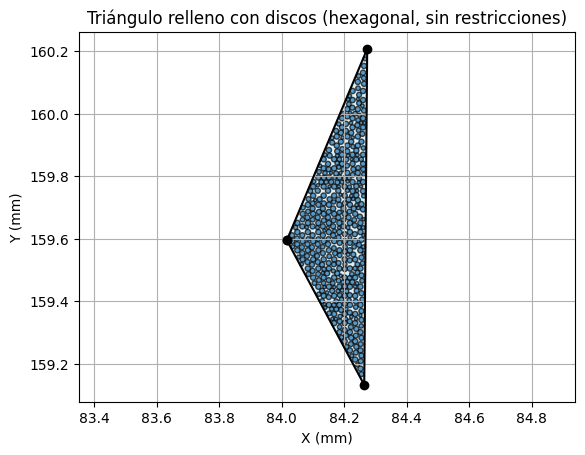

In [6]:
# PACKING 2D DE UN ÚNICO TRIÁNGULO

import matplotlib.pyplot as plt
import numpy as np
from stl import mesh
from scipy.spatial import distance
from collections import Counter

# Radios en milímetros
R_MIN = 5.052 / 1000
R_MAX = 8.413 / 1000

def area_triangle(v1, v2, v3):
    return abs((v1[0] * (v2[1] - v3[1]) + v2[0] * (v3[1] - v1[1]) + v3[0] * (v1[1] - v2[1])) / 2.0)

def is_inside_triangle(pt, v1, v2, v3):
    def sign(p1, p2, p3):
        return (p1[0] - p3[0])*(p2[1] - p3[1]) - (p2[0] - p3[0])*(p1[1] - p3[1])
    b1 = sign(pt, v1, v2) < 0.0
    b2 = sign(pt, v2, v3) < 0.0
    b3 = sign(pt, v3, v1) < 0.0
    return (b1 == b2) and (b2 == b3)

def can_place_circle(x, y, r, circles, v1, v2, v3):
    # Comprobar si todos los puntos del borde del disco están dentro del triángulo
    num_check_points = 8  # Más puntos = más precisión
    for angle in np.linspace(0, 2 * np.pi, num_check_points, endpoint=False):
        bx = x + r * np.cos(angle)
        by = y + r * np.sin(angle)
        if not is_inside_triangle((bx, by), v1, v2, v3):
            return False

    # Comprobar solapamiento con otros discos
    for cx, cy, cr in circles:
        if distance.euclidean((x, y), (cx, cy)) < cr + r:
            return False
    return True


def fill_triangle_hexagonal(v1, v2, v3):
    circles = []
    radii = np.linspace(R_MAX, R_MIN, num=20)

    xmin, xmax = min(v1[0], v2[0], v3[0]), max(v1[0], v2[0], v3[0])
    ymin, ymax = min(v1[1], v2[1], v3[1]), max(v1[1], v2[1], v3[1])

    for r in radii:
        dy = r * np.sqrt(3)
        y = ymin + r
        row = 0
        while y <= ymax - r:
            dx = 2 * r
            offset = 0 if row % 2 == 0 else r
            x = xmin + r + offset
            while x <= xmax - r:
                if can_place_circle(x, y, r, circles, v1, v2, v3):
                    circles.append((x, y, r))
                x += dx
            y += dy
            row += 1
    return circles

# Cargar el modelo STL y extraer vértices del triángulo
archivo_entrada = "C:/Users/aranc/OneDrive/Escritorio/MASTER/TFM/facet_extraida_0.stl"
modelo = mesh.Mesh.from_file(archivo_entrada)
v1, v2, v3 = modelo.vectors[0][:, :2]  # Obtener solo X, Y

# Calcular área del triángulo
triangle_area = area_triangle(v1, v2, v3)

# Generar los discos
circle_data = fill_triangle_hexagonal(v1, v2, v3)

# Estadísticas
num_circles = len(circle_data)
total_circle_area = sum(np.pi * r**2 for _, _, r in circle_data)
radii = [r for _, _, r in circle_data]
min_radius, max_radius = min(radii), max(radii)

# Mostrar resultados
print(f"Cantidad total de discos: {num_circles}")
print(f"Radio mínimo encontrado: {min_radius:.6f} mm")
print(f"Radio máximo encontrado: {max_radius:.6f} mm")
print(f"Área del triángulo: {triangle_area:.6f} mm²")
print(f"Área total ocupada por los discos: {total_circle_area:.6f} mm²")
print(f"Porcentaje del área del triángulo cubierta por discos: {100 * total_circle_area / triangle_area:.2f} %")

# Desglose por tamaño de discos (en µm)
rounded_radii = [round(r * 1000, 3) for r in radii]
radii_count = Counter(rounded_radii)

print("\nDesglose por tamaño de discos (en µm):")
for radius_mm, count in sorted(radii_count.items(), reverse=True):
    print(f"  Radio: {radius_mm:.3f} µm -> {count} discos")

# Graficar triángulo
x_tri = [v1[0], v2[0], v3[0], v1[0]]
y_tri = [v1[1], v2[1], v3[1], v1[1]]
plt.plot(x_tri, y_tri, marker='o', linestyle='-', color='black')
plt.fill(x_tri, y_tri, color='lightblue', alpha=0.4)

# Graficar los discos
for x, y, r in circle_data:
    plt.gca().add_patch(plt.Circle((x, y), r, fill=True, alpha=0.7, edgecolor='black'))

plt.xlabel("X (mm)")
plt.ylabel("Y (mm)")
plt.title("Triángulo relleno con discos (hexagonal, sin restricciones)")
plt.axis("equal")
plt.grid(True)
plt.show()

In [7]:
# PACKING 3D DE UN ÚNICO TRIÁNGULO

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from stl import mesh
from scipy.spatial import distance
from collections import Counter
import csv

# Radios en milímetros
R_MIN = 5.052 / 1000
R_MAX = 8.413 / 1000

def area_triangle(v1, v2, v3):
    return abs((v1[0] * (v2[1] - v3[1]) + v2[0] * (v3[1] - v1[1]) + v3[0] * (v1[1] - v2[1])) / 2.0)

def is_inside_triangle(pt, v1, v2, v3):
    def sign(p1, p2, p3):
        return (p1[0] - p3[0])*(p2[1] - p3[1]) - (p2[0] - p3[0])*(p1[1] - p3[1])
    b1 = sign(pt, v1, v2) < 0.0
    b2 = sign(pt, v2, v3) < 0.0
    b3 = sign(pt, v3, v1) < 0.0
    return (b1 == b2) and (b2 == b3)

def can_place_sphere(x, y, z, r, spheres, v1, v2, v3):
    num_check_points = 8
    for angle in np.linspace(0, 2 * np.pi, num_check_points, endpoint=False):
        bx = x + r * np.cos(angle)
        by = y + r * np.sin(angle)
        if not is_inside_triangle((bx, by), v1, v2, v3):
            return False
    for cx, cy, cz, cr in spheres:
        if distance.euclidean((x, y, z), (cx, cy, cz)) < cr + r:
            return False
    return True

def fill_triangle_hexagonal(v1, v2, v3, z_level=0.0):
    spheres = []
    radii = np.linspace(R_MAX, R_MIN, num=20)

    xmin, xmax = min(v1[0], v2[0], v3[0]), max(v1[0], v2[0], v3[0])
    ymin, ymax = min(v1[1], v2[1], v3[1]), max(v1[1], v2[1], v3[1])

    for r in radii:
        dy = r * np.sqrt(3)
        y = ymin + r
        row = 0
        while y <= ymax - r:
            dx = 2 * r
            offset = 0 if row % 2 == 0 else r
            x = xmin + r + offset
            while x <= xmax - r:
                if can_place_sphere(x, y, z_level, r, spheres, v1, v2, v3):
                    spheres.append((x, y, z_level, r))
                x += dx
            y += dy
            row += 1
    return spheres

# Cargar STL y obtener vértices del primer triángulo
archivo_entrada = "C:/Users/aranc/OneDrive/Escritorio/MASTER/TFM/facet_extraida_0.stl"
modelo = mesh.Mesh.from_file(archivo_entrada)
triangulo = modelo.vectors[0]
v1, v2, v3 = triangulo

# Calcular área proyectada en XY
triangle_area = area_triangle(v1[:2], v2[:2], v3[:2])

# Generar esferas
sphere_data = fill_triangle_hexagonal(v1, v2, v3, z_level=v1[2])

# Estadísticas
num_spheres = len(sphere_data)
total_volume = sum((4/3) * np.pi * r**3 for _, _, _, r in sphere_data)
total_area_2d = sum(np.pi * r**2 for _, _, _, r in sphere_data)
radii = [r for _, _, _, r in sphere_data]

# Resultados
print(f"Cantidad total de esferas: {num_spheres}")
print(f"Radio mínimo encontrado: {min(radii):.6f} mm")
print(f"Radio máximo encontrado: {max(radii):.6f} mm")
print(f"Área del triángulo proyectado: {triangle_area:.6f} mm²")
print(f"Área total ocupada por discos proyectados: {total_area_2d:.6f} mm²")
print(f"Volumen total de esferas: {total_volume:.6f} mm³")
print(f"Porcentaje del área proyectada cubierta por discos: {100 * total_area_2d / triangle_area:.2f} %")

# Desglose por tamaño de radios
rounded_radii = [round(r * 1000, 3) for r in radii]
radii_count = Counter(rounded_radii)
print("\nDesglose por tamaño de radios (en µm):")
for radius_mm, count in sorted(radii_count.items(), reverse=True):
    print(f"  Radio: {radius_mm:.3f} µm -> {count} esferas")

# Guardar en CSV
output_csv = "esferas_datos.csv"
with open(output_csv, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["X", "Y", "Z", "TIPO_CELULAR", "VOLUMEN_mm3"])
    for x, y, z, r in sphere_data:
        volumen = (4/3) * np.pi * r**3
        writer.writerow([x, y, z, "EPITHELIAL", volumen])

print(f"\nDatos de las esferas guardados en: {output_csv}")

Cantidad total de esferas: 436
Radio mínimo encontrado: 0.005052 mm
Radio máximo encontrado: 0.008413 mm
Área del triángulo proyectado: 0.135418 mm²
Área total ocupada por discos proyectados: 0.080236 mm²
Volumen total de esferas: 0.000838 mm³
Porcentaje del área proyectada cubierta por discos: 59.25 %

Desglose por tamaño de radios (en µm):
  Radio: 8.413 µm -> 134 esferas
  Radio: 8.236 µm -> 62 esferas
  Radio: 8.059 µm -> 39 esferas
  Radio: 7.882 µm -> 31 esferas
  Radio: 7.705 µm -> 18 esferas
  Radio: 7.529 µm -> 16 esferas
  Radio: 7.352 µm -> 16 esferas
  Radio: 7.175 µm -> 13 esferas
  Radio: 6.998 µm -> 13 esferas
  Radio: 6.821 µm -> 7 esferas
  Radio: 6.644 µm -> 10 esferas
  Radio: 6.467 µm -> 5 esferas
  Radio: 6.290 µm -> 7 esferas
  Radio: 6.113 µm -> 11 esferas
  Radio: 5.936 µm -> 4 esferas
  Radio: 5.760 µm -> 7 esferas
  Radio: 5.583 µm -> 9 esferas
  Radio: 5.406 µm -> 10 esferas
  Radio: 5.229 µm -> 12 esferas
  Radio: 5.052 µm -> 12 esferas

Datos de las esferas

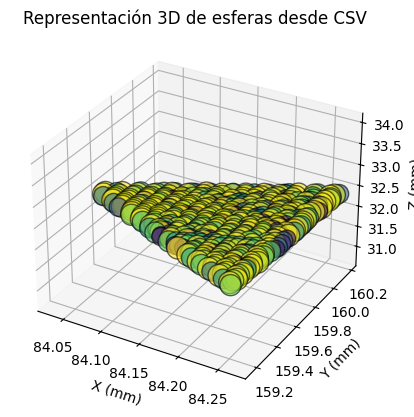

In [8]:
# REPRESENTACIÓN 3D DE ESFERAS

import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Leer CSV
csv_path = "esferas_datos.csv"
x_vals, y_vals, z_vals, radios = [], [], [], []

with open(csv_path, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        x = float(row["X"])
        y = float(row["Y"])
        z = float(row["Z"])
        volumen = float(row["VOLUMEN_mm3"])
        r = ((3 * volumen) / (4 * np.pi)) ** (1/3)  # radio a partir del volumen

        x_vals.append(x)
        y_vals.append(y)
        z_vals.append(z)
        radios.append(r)

# Visualizar con scatter3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Para representar como puntos proporcionales al volumen
ax.scatter(x_vals, y_vals, z_vals, s=np.array(radios)*30000, c=radios, cmap='viridis', alpha=0.6, edgecolor='k')

ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Z (mm)')
ax.set_title('Representación 3D de esferas desde CSV')
plt.show()

Triángulo base (índice 0):
[[84.01632690429688, 159.5950164794922, 32.36286163330078], [84.27352905273438, 160.20750427246094, 33.196983337402344], [84.26405334472656, 159.1319122314453, 33.120330810546875]]

Vecinos encontrados (3):
Índice 1: [[84.01632690429688, 159.5950164794922, 32.36286163330078], [84.26405334472656, 159.1319122314453, 33.120330810546875], [83.9873275756836, 158.4679718017578, 32.21399688720703]]
Índice 4780: [[84.3721923828125, 159.36029052734375, 33.64928436279297], [84.26405334472656, 159.1319122314453, 33.120330810546875], [84.27352905273438, 160.20750427246094, 33.196983337402344]]
Índice 4781: [[84.01632690429688, 159.5950164794922, 32.36286163330078], [83.90628051757812, 160.72154235839844, 32.22486114501953], [84.27352905273438, 160.20750427246094, 33.196983337402344]]
Archivo guardado: facet_extraidaVecinos.stl


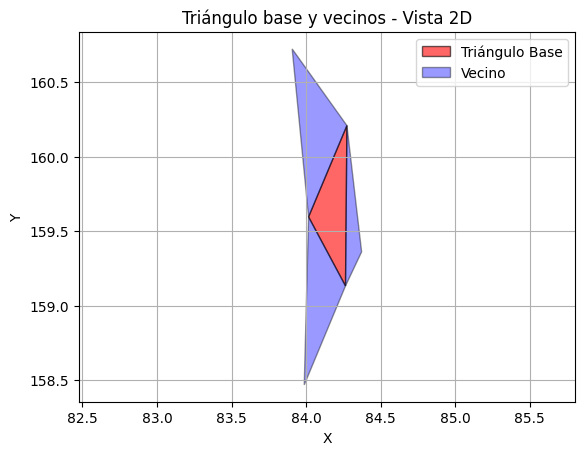

In [9]:
# OBTENER TRIÁNGULO BASE + 3 TRIÁNGULOS VECINOS

from stl import mesh
import numpy as np
import matplotlib.pyplot as plt

# Ruta archivo STL
archivo_entrada = "C:/Users/aranc/OneDrive/Escritorio/MASTER/TFM/m3_mini.stl"
modelo = mesh.Mesh.from_file(archivo_entrada)

# Función para encontrar los vecinos de un triángulo
def encontrar_vecinos(modelo, indice_facet):
    vecinos = []
    triangulo_base = modelo.vectors[indice_facet]
    aristas_base = {
        frozenset((tuple(triangulo_base[0]), tuple(triangulo_base[1]))),
        frozenset((tuple(triangulo_base[1]), tuple(triangulo_base[2]))),
        frozenset((tuple(triangulo_base[2]), tuple(triangulo_base[0])))
    }

    for i, facet in enumerate(modelo.vectors):
        if i == indice_facet:
            continue
        aristas_facet = {
            frozenset((tuple(facet[0]), tuple(facet[1]))),
            frozenset((tuple(facet[1]), tuple(facet[2]))),
            frozenset((tuple(facet[2]), tuple(facet[0])))
        }

        if aristas_base & aristas_facet:  # Intersección no vacía → vecino
            vecinos.append((i, facet))

    return vecinos

# Usar la primera facet extraida
indice_facet = 0
facet_extraida = modelo.vectors[indice_facet]
vecinos = encontrar_vecinos(modelo, indice_facet)

# Imprimir vecinos encontrados
echo = "\n".join([f"Índice {i}: {vec.tolist()}" for i, vec in vecinos])
print(f"Triángulo base (índice {indice_facet}):\n{facet_extraida.tolist()}")
print(f"\nVecinos encontrados ({len(vecinos)}):\n{echo}")

# Guardar la facet y sus vecinos como un nuevo STL
nuevo_mesh = mesh.Mesh(np.zeros(len(vecinos) + 1, dtype=mesh.Mesh.dtype))
nuevo_mesh.vectors[0] = facet_extraida
for j, (_, vec) in enumerate(vecinos):
    nuevo_mesh.vectors[j + 1] = vec
nuevo_mesh.save("facet_extraidaVecinos.stl")
print("Archivo guardado: facet_extraidaVecinos.stl")

# Visualizar en 2D (proyección XY)
plt.figure()

# Triángulo base
x_base, y_base = zip(*[(v[0], v[1]) for v in facet_extraida])
plt.fill(x_base, y_base, color='red', alpha=0.6, edgecolor='black', label='Triángulo Base')

# Triángulos vecinos
for _, vec in vecinos:
    x_vec, y_vec = zip(*[(v[0], v[1]) for v in vec])
    plt.fill(x_vec, y_vec, color='blue', alpha=0.4, edgecolor='black', label='Vecino')

# Evitar múltiples etiquetas duplicadas en la leyenda
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
plt.legend(unique_labels.values(), unique_labels.keys())

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Triángulo base y vecinos - Vista 2D")
plt.grid(True)
plt.axis('equal')
plt.show()


# === RESULTADOS DETALLADOS ===
Cantidad total de discos: 2029
Radio mínimo encontrado: 0.005052 mm
Radio máximo encontrado: 0.008413 mm
Área total de triángulos proyectados: 0.517381 mm²
Área total ocupada por discos: 0.343326 mm²
Porcentaje del área cubierta: 66.36 %

Desglose por tamaño de radios (en µm):
  Radio: 8.413 µm -> 672 discos
  Radio: 8.236 µm -> 145 discos
  Radio: 8.059 µm -> 86 discos
  Radio: 7.882 µm -> 63 discos
  Radio: 7.705 µm -> 38 discos
  Radio: 7.529 µm -> 32 discos
  Radio: 7.352 µm -> 45 discos
  Radio: 7.175 µm -> 33 discos
  Radio: 6.998 µm -> 76 discos
  Radio: 6.821 µm -> 53 discos
  Radio: 6.644 µm -> 63 discos
  Radio: 6.467 µm -> 87 discos
  Radio: 6.290 µm -> 137 discos
  Radio: 6.113 µm -> 94 discos
  Radio: 5.936 µm -> 92 discos
  Radio: 5.760 µm -> 80 discos
  Radio: 5.583 µm -> 92 discos
  Radio: 5.406 µm -> 46 discos
  Radio: 5.229 µm -> 61 discos
  Radio: 5.052 µm -> 34 discos

Discos guardados en 'discos_generados.csv'.


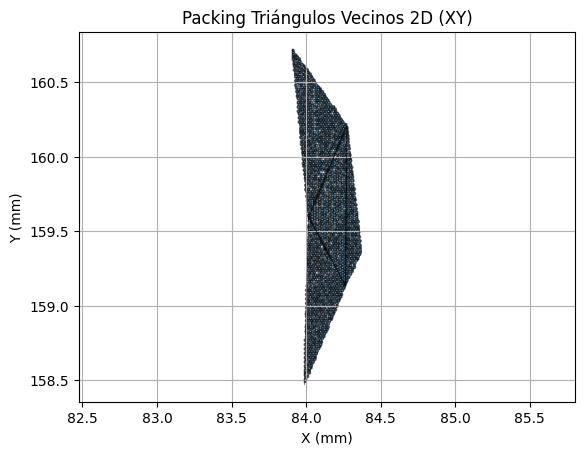

In [11]:
# PACKING 2D DE TRIÁNGULOS VECINOS

import matplotlib.pyplot as plt
import numpy as np
from stl import mesh
from scipy.spatial import distance
from collections import Counter
import csv

# Radios en milímetros
R_MIN = 5.052 / 1000
R_MAX = 8.413 / 1000

def area_triangle(v1, v2, v3):
    """Área del triángulo en 2D."""
    return abs((v1[0] * (v2[1] - v3[1]) + 
                v2[0] * (v3[1] - v1[1]) + 
                v3[0] * (v1[1] - v2[1])) / 2.0)

def is_inside_triangle(pt, v1, v2, v3):
    """Comprueba si un punto está dentro del triángulo usando el método de signos."""
    def sign(p1, p2, p3):
        return (p1[0] - p3[0])*(p2[1] - p3[1]) - (p2[0] - p3[0])*(p1[1] - p3[1])
    b1 = sign(pt, v1, v2) < 0.0
    b2 = sign(pt, v2, v3) < 0.0
    b3 = sign(pt, v3, v1) < 0.0
    return (b1 == b2) and (b2 == b3)

def can_place_circle(x, y, r, circles, v1, v2, v3):
    """Verifica si un círculo se puede colocar sin superposición y dentro del triángulo."""
    if not is_inside_triangle((x, y), v1, v2, v3):
        return False
    for cx, cy, cr in circles:
        if distance.euclidean((x, y), (cx, cy)) < (cr + r):
            return False
    return True

def fill_triangle_hexagonal(v1, v2, v3):
    """Relleno hexagonal dentro de un triángulo 2D."""
    circles = []
    radii = np.linspace(R_MAX, R_MIN, num=20)

    xmin, xmax = min(v1[0], v2[0], v3[0]), max(v1[0], v2[0], v3[0])
    ymin, ymax = min(v1[1], v2[1], v3[1]), max(v1[1], v2[1], v3[1])

    for r in radii:
        dy = r * np.sqrt(3)
        y = ymin + r
        row = 0
        while y <= ymax - r:
            dx = 2 * r
            offset = 0 if row % 2 == 0 else r
            x = xmin + r + offset
            while x <= xmax - r:
                if can_place_circle(x, y, r, circles, v1, v2, v3):
                    circles.append((x, y, r))
                x += dx
            y += dy
            row += 1
    return circles

# === CARGAR STL Y PROCESAR ===
archivo_entrada = "facet_extraidaVecinos.stl"
modelo = mesh.Mesh.from_file(archivo_entrada)

plt.figure()
todas_las_circulos = []
total_area = 0
circulos_ya_colocados = set()  # Para evitar duplicados exactos

for triangle in modelo.vectors:
    v1, v2, v3 = triangle[:, :2]  # XY
    if np.allclose(v1, v2) or np.allclose(v2, v3) or np.allclose(v3, v1):
        continue  # Triángulo degenerado

    area = area_triangle(v1, v2, v3)
    total_area += area

    circulos = fill_triangle_hexagonal(v1, v2, v3)
    for x, y, r in circulos:
        clave = (round(x, 5), round(y, 5), round(r, 5))
        if clave not in circulos_ya_colocados:
            todas_las_circulos.append((x, y, r))
            circulos_ya_colocados.add(clave)

    # Dibujar triángulo
    plt.plot([v1[0], v2[0], v3[0], v1[0]], 
             [v1[1], v2[1], v3[1], v1[1]], 
             color='black', linewidth=0.5, alpha=0.5)

# === GRAFICAR LOS CÍRCULOS ===
for x, y, r in todas_las_circulos:
    plt.gca().add_patch(plt.Circle((x, y), r, fill=True, alpha=0.6, edgecolor='black'))

# === ESTADÍSTICAS ===
num_circles = len(todas_las_circulos)
total_circle_area = sum(np.pi * r**2 for _, _, r in todas_las_circulos)
radii = [r for _, _, r in todas_las_circulos]
min_radius, max_radius = min(radii), max(radii)

#print(f"Cantidad total de discos: {num_circles}")
#print(f"Radio mínimo encontrado: {min_radius:.6f} mm")
#print(f"Radio máximo encontrado: {max_radius:.6f} mm")
#print(f"Área total de triángulos: {total_area:.6f} mm²")
#print(f"Área total ocupada por los discos: {total_circle_area:.6f} mm²")
#print(f"Porcentaje de área cubierta: {100 * total_circle_area / total_area:.2f} %")

# === RESUMEN DETALLADO DE RESULTADOS ===
rounded_radii = [round(r * 1000, 3) for r in radii]  # Convertir a micrómetros
radii_count = Counter(rounded_radii)

print("\n# === RESULTADOS DETALLADOS ===")
print(f"Cantidad total de discos: {num_circles}")
print(f"Radio mínimo encontrado: {min_radius:.6f} mm")
print(f"Radio máximo encontrado: {max_radius:.6f} mm")
print(f"Área total de triángulos proyectados: {total_area:.6f} mm²")
print(f"Área total ocupada por discos: {total_circle_area:.6f} mm²")
print(f"Porcentaje del área cubierta: {100 * total_circle_area / total_area:.2f} %")

print("\nDesglose por tamaño de radios (en µm):")
for radius_um, count in sorted(radii_count.items(), reverse=True):
    print(f"  Radio: {radius_um:.3f} µm -> {count} discos")

# === GUARDAR EN CSV ===
with open("discos_generados.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["X", "Y", "RADIO_mm"])
    for x, y, r in todas_las_circulos:
        writer.writerow([x, y, r])

print("\nDiscos guardados en 'discos_generados.csv'.")

# === GRÁFICO ===
plt.xlabel("X (mm)")
plt.ylabel("Y (mm)")
plt.title("Packing Triángulos Vecinos 2D (XY)")
plt.axis("equal")
plt.grid(True)
plt.show()


# === RESULTADOS DETALLADOS ===
Cantidad total de esferas: 2029
Radio mínimo encontrado: 0.005052 mm
Radio máximo encontrado: 0.008413 mm
Área del triángulo proyectado: 0.517381 mm²
Área total ocupada por discos proyectados: 0.343326 mm²
Volumen total de esferas: 0.003475 mm³
Porcentaje del área proyectada cubierta por discos: 66.36 %

Desglose por tamaño de radios (en µm):
  Radio: 8.413 µm -> 672 esferas
  Radio: 8.236 µm -> 145 esferas
  Radio: 8.059 µm -> 86 esferas
  Radio: 7.882 µm -> 63 esferas
  Radio: 7.705 µm -> 38 esferas
  Radio: 7.529 µm -> 32 esferas
  Radio: 7.352 µm -> 45 esferas
  Radio: 7.175 µm -> 33 esferas
  Radio: 6.998 µm -> 76 esferas
  Radio: 6.821 µm -> 53 esferas
  Radio: 6.644 µm -> 63 esferas
  Radio: 6.467 µm -> 87 esferas
  Radio: 6.290 µm -> 137 esferas
  Radio: 6.113 µm -> 94 esferas
  Radio: 5.936 µm -> 92 esferas
  Radio: 5.760 µm -> 80 esferas
  Radio: 5.583 µm -> 92 esferas
  Radio: 5.406 µm -> 46 esferas
  Radio: 5.229 µm -> 61 esferas
  Radio: 5.

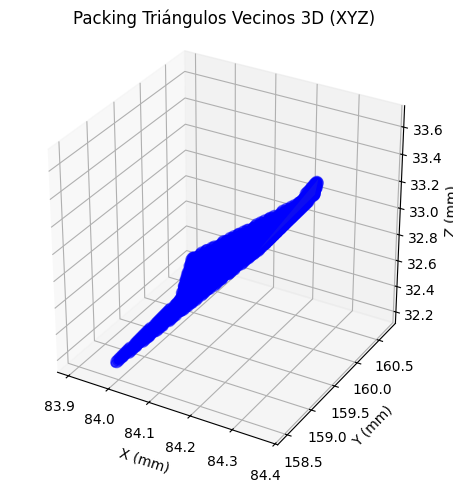

In [12]:
#PACKING 3D DE TRIÁNGULOS VECINOS

import numpy as np
from stl import mesh
from scipy.spatial import distance
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, PathPatch3D
import csv
from collections import Counter


# Radios en milímetros
R_MIN = 5.052 / 1000
R_MAX = 8.413 / 1000

def barycentric_projection_3d(v1, v2, v3, pt2d):
    """Proyecta un punto 2D dentro del triángulo original en coordenadas 3D usando coordenadas baricéntricas."""
    A = np.array([[v1[0], v2[0], v3[0]],
                  [v1[1], v2[1], v3[1]],
                  [1,     1,     1]])
    b = np.array([pt2d[0], pt2d[1], 1])
    w = np.linalg.solve(A, b)
    return w[0] * v1 + w[1] * v2 + w[2] * v3

def area_triangle(v1, v2, v3):
    """Área del triángulo en 2D."""
    return abs((v1[0] * (v2[1] - v3[1]) + 
                v2[0] * (v3[1] - v1[1]) + 
                v3[0] * (v1[1] - v2[1])) / 2.0)

def is_inside_triangle(pt, v1, v2, v3):
    """Comprueba si un punto está dentro del triángulo usando el método de signos."""
    def sign(p1, p2, p3):
        return (p1[0] - p3[0])*(p2[1] - p3[1]) - (p2[0] - p3[0])*(p1[1] - p3[1])
    b1 = sign(pt, v1, v2) < 0.0
    b2 = sign(pt, v2, v3) < 0.0
    b3 = sign(pt, v3, v1) < 0.0
    return (b1 == b2) and (b2 == b3)

def can_place_circle(x, y, r, circles, v1, v2, v3):
    """Verifica si un círculo se puede colocar sin superposición y dentro del triángulo."""
    if not is_inside_triangle((x, y), v1, v2, v3):
        return False
    for cx, cy, cr in circles:
        if distance.euclidean((x, y), (cx, cy)) < (cr + r):
            return False
    return True

def fill_triangle_hexagonal(v1, v2, v3, tri3d):
    """Relleno hexagonal dentro de un triángulo 2D y mapea puntos a 3D."""
    circles_3d = []
    circles_2d = []
    radii = np.linspace(R_MAX, R_MIN, num=20)

    xmin, xmax = min(v1[0], v2[0], v3[0]), max(v1[0], v2[0], v3[0])
    ymin, ymax = min(v1[1], v2[1], v3[1]), max(v1[1], v2[1], v3[1])

    for r in radii:
        dy = r * np.sqrt(3)
        y = ymin + r
        row = 0
        while y <= ymax - r:
            dx = 2 * r
            offset = 0 if row % 2 == 0 else r
            x = xmin + r + offset
            while x <= xmax - r:
                if can_place_circle(x, y, r, circles_2d, v1, v2, v3):
                    pos3d = barycentric_projection_3d(tri3d[0], tri3d[1], tri3d[2], (x, y))
                    circles_3d.append((pos3d[0], pos3d[1], pos3d[2], r))
                    circles_2d.append((x, y, r))
                x += dx
            y += dy
            row += 1
    return circles_3d

# === CARGAR STL Y PROCESAR ===
archivo_entrada = "facet_extraidaVecinos.stl"
modelo = mesh.Mesh.from_file(archivo_entrada)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

todas_esferas = []
total_area = 0
ya_colocados = set()

for tri in modelo.vectors:
    tri2d = tri[:, :2]  # Proyección XY
    if np.allclose(tri2d[0], tri2d[1]) or np.allclose(tri2d[1], tri2d[2]) or np.allclose(tri2d[2], tri2d[0]):
        continue

    total_area += area_triangle(tri2d[0], tri2d[1], tri2d[2])
    esferas = fill_triangle_hexagonal(tri2d[0], tri2d[1], tri2d[2], tri)
    for x, y, z, r in esferas:
        clave = (round(x, 5), round(y, 5), round(z, 5), round(r, 5))
        if clave not in ya_colocados:
            todas_esferas.append((x, y, z, r))
            ya_colocados.add(clave)

    # Mostrar malla STL (wireframe)
    ax.add_collection3d(Poly3DCollection([tri], alpha=0.1, facecolor='gray'))

# === GRAFICAR ESFERAS (como puntos por simplicidad) ===
xs, ys, zs = zip(*[(x, y, z) for x, y, z, _ in todas_esferas])
rs = [r for _, _, _, r in todas_esferas]
ax.scatter(xs, ys, zs, s=[(r*1e3)**2 for r in rs], c='blue', alpha=0.5)

# === ESTADÍSTICAS ===
num_esferas = len(todas_esferas)
vol_total = sum((4/3)*np.pi*r**3 for _, _, _, r in todas_esferas)
vol_max = (4/3)*np.pi*R_MAX**3
vol_min = (4/3)*np.pi*R_MIN**3

#print(f"Cantidad total de esferas: {num_esferas}")
#print(f"Volumen total de esferas: {vol_total:.6f} mm³")
#print(f"Volumen esfera máx: {vol_max:.6f} mm³")
#print(f"Volumen esfera mín: {vol_min:.6f} mm³")

# === RESUMEN DETALLADO DE RESULTADOS ===
rounded_radii = [round(r * 1000, 3) for r in rs]  # Convertir a micrómetros
radii_count = Counter(rounded_radii)
area_proyectada = total_area  # Ya está calculada en 2D

area_proyectada_ocupada = sum(np.pi * r**2 for r in rs)  # proyección de cada esfera en XY

print("\n# === RESULTADOS DETALLADOS ===")
print(f"Cantidad total de esferas: {num_esferas}")
print(f"Radio mínimo encontrado: {min(rs):.6f} mm")
print(f"Radio máximo encontrado: {max(rs):.6f} mm")
print(f"Área del triángulo proyectado: {area_proyectada:.6f} mm²")
print(f"Área total ocupada por discos proyectados: {area_proyectada_ocupada:.6f} mm²")
print(f"Volumen total de esferas: {vol_total:.6f} mm³")
print(f"Porcentaje del área proyectada cubierta por discos: {100 * area_proyectada_ocupada / area_proyectada:.2f} %")

print("\nDesglose por tamaño de radios (en µm):")
for radius_um, count in sorted(radii_count.items(), reverse=True):
    print(f"  Radio: {radius_um:.3f} µm -> {count} esferas")


# === GUARDAR CSV ===
with open("esferas_3d.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["X", "Y", "Z", "TIPO_CELULAR", "VOLUMEN_um3"])
    for x, y, z, r in todas_esferas:
        volumen_um3 = (4/3) * np.pi * (r**3) * 1e9  # mm³ a µm³
        writer.writerow([x, y, z, "EPITHELIAL", volumen_um3])


print("\nEsferas guardadas en 'esferas_3d.csv'.")

# === GRÁFICO 3D ===
ax.set_xlabel("X (mm)")
ax.set_ylabel("Y (mm)")
ax.set_zlabel("Z (mm)")
ax.set_title("Packing Triángulos Vecinos 3D (XYZ)")
ax.set_box_aspect([1,1,1])
plt.tight_layout()
plt.show()